# Finding the best markets to advertise in

An online learning company has a large portfolio of courses in web development, data science, and other topics. Our goal is to find the best markets to advertise the product in.

For our analysis we will use data from the _freeCodeCamp's 2017 New Coder Survey_. This is significantly cheaper and more convenient than organizing a separate ad-hoc survey. The data can be downloaded from its [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [66]:
%matplotlib inline

In [79]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
survey.shape

(18175, 136)

In [5]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

We see that:
* A sizeable number of students are interested in web development.
* A smaller number of students are interested in mobile development.
* Most students are interested in more than one career.

Next, we produce a dictionary containing the frequency of unique job titles.

In [20]:
unique_job_interest = {}

for line in survey['JobRoleInterest'].dropna():
    uniques = line.split(',')
    for job in uniques:
        job = job.lower().strip()

        if job in unique_job_interest:
            unique_job_interest[job] += 1
        elif job not in unique_job_interest:
            unique_job_interest[job] = 1    

In [45]:
unique_job = pd.Series(unique_job_interest)
unique_job.shape

(193,)

In [47]:
unique_job.sort_values(ascending=False)

full-stack web developer                                                                     4198
front-end web developer                                                                      3533
back-end web developer                                                                       2772
mobile developer                                                                             2305
data scientist                                                                               1643
game developer                                                                               1628
user experience designer                                                                     1469
information security                                                                         1326
data engineer                                                                                1248
devops / sysadmin                                                                             927
product manager     

In [49]:
# Computing percentages
unique_job.sort_values(ascending=False) /sum(unique_job) * 100

full-stack web developer                                                                     18.575221
front-end web developer                                                                      15.632743
back-end web developer                                                                       12.265487
mobile developer                                                                             10.199115
data scientist                                                                                7.269912
game developer                                                                                7.203540
user experience designer                                                                      6.500000
information security                                                                          5.867257
data engineer                                                                                 5.522124
devops / sysadmin                                                        

There are roughly 193 unique desired professions (there are some repetitions). 

Moreover:
* Approximately 45% of the desired professions involve web development (top 3 desired professions)
* Mobile development represents 10.2% of the desired professions.

Next we investigate how many people expressed one preference vs how many expressed more than one.

In [50]:
nr_unique_job_interest = {}

for line in survey['JobRoleInterest'].dropna():
    nr_uniques = len(line.split(','))
    if nr_uniques not in nr_unique_job_interest:
        nr_unique_job_interest[nr_uniques] = 1
    elif nr_uniques in nr_unique_job_interest:
        nr_unique_job_interest[nr_uniques] += 1

In [53]:
nr_unique_job = pd.Series(nr_unique_job_interest)
nr_unique_job

1     2213
2      761
3     1111
4     1064
5      842
6      470
7      270
8      123
9       69
10      33
11      13
12      21
13       2
dtype: int64

In [54]:
# Computing percentages

nr_unique_job / sum(nr_unique_job)*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
dtype: float64

We see that more than 30% of the students have expressed only one preference. Next we isolate the students that have expressed only one preference and study those.

In [32]:
logical_index = survey['JobRoleInterest'].fillna('don\'t know').str.split(',').apply(len) == 1
one_preference = survey[logical_index].dropna(axis=0, subset=['JobRoleInterest'])

In [33]:
one_preference['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                          37.189336
  Front-End Web Developer                                                         20.334388
  Data Scientist                                                                   6.868504
Back-End Web Developer                                                             6.416629
  Mobile Developer                                                                 5.286941
Game Developer                                                                     5.151378
Information Security                                                               4.157253
  Product Manager                                                                  2.485314
Data Engineer                                                                      2.394939
  User Experience Designer                                                         2.349751
  DevOps / SysAdmin                                                             

In this context we find again that a large proportion of students (~64%) wants to work in web development. A smaller proportion (~5%) wants to work in mobile development. Finally, we visualize this.

In [71]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

web_mobile = one_preference['JobRoleInterest'].str.contains('[Ww]eb [Dd]eveloper|[Mm]obile [Dd]eveloper')

([<matplotlib.axis.XTick at 0x7f2216887ef0>,
 <a list of 2 Text xticklabel objects>)

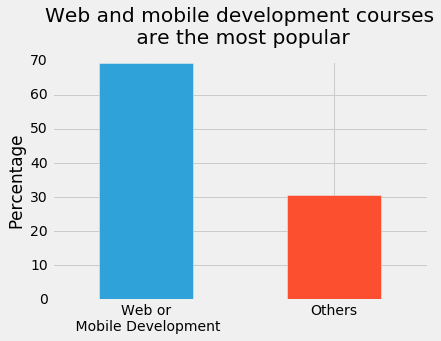

In [72]:
web_mobile.value_counts(normalize=True).apply(lambda x: x*100).plot.bar()
plt.title('Web and mobile development courses\n are the most popular', y=1.05)
plt.ylabel('Percentage')
plt.xticks([0,1], ['Web or\n Mobile Development', 'Others'], rotation = 0)

Next, we analyze the data to determine the best market (i.e. country) to advertise the online courses in. We begin by computing a frequency table.

In [74]:
clean_survey = survey.dropna(axis=0, subset=['JobRoleInterest'])

In [78]:
absolute_frequencies = clean_survey['CountryLive'].value_counts()
relative_frequencies = clean_survey['CountryLive'].value_counts(normalize=True)*100

pd.DataFrame(data = {'Absolute frequencies': absolute_frequencies, 'Relative frequencies': relative_frequencies})

,Absolute frequencies,Relative frequencies
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The two biggest markets are decidedly the USA and India. This suggets that marketing should be focus on the USE and India. However, we need to take into account how much students are willing to spend on learning. This is what we do next.

We replace the value 0 in the _MonthsProgramming_ column with 1 in order to be able to compute the amount of money spent per month.

In [85]:
clean_survey['MonthsProgramming'].replace(0,1,inplace=True)
clean_survey['MoneyPerMonth'] = clean_survey['MoneyForLearning'] / clean_survey['MonthsProgramming']

In [92]:
clean_survey.dropna(subset=['CountryLive'], inplace=True)

In [96]:
average_spending = clean_survey.groupby(by='CountryLive')['MoneyPerMonth'].mean()
average_spending

CountryLive
Afghanistan                     0.000000
Albania                         7.111111
Algeria                         0.000000
Angola                        116.666667
Anguilla                        0.000000
Argentina                      55.984444
Aruba                                NaN
Australia                     419.268452
Austria                       936.208333
Azerbaijan                     25.555556
Bahrain                         0.000000
Bangladesh                    239.361883
Belarus                        21.323854
Belgium                        53.774510
Bolivia                              NaN
Bosnia & Herzegovina           19.807540
Botswana                        0.000000
Brazil                         56.239402
Bulgaria                       75.833333
Cambodia                       10.079365
Cameroon                        0.946970
Canada                        113.510961
Cayman Islands                  0.000000
Channel Islands                 0.000000
Chil

In [98]:
average_spending.sort_values(ascending=False)

CountryLive
Yemen                       10000.000000
Puerto Rico                  4291.394558
Austria                       936.208333
Spain                         784.553084
Jamaica                       747.037037
Hong Kong                     523.341049
Trinidad & Tobago             500.000000
Australia                     419.268452
Taiwan                        417.966524
Luxembourg                    338.817664
Norway                        318.914815
New Zealand                   316.171958
Chile                         300.416667
Israel                        298.130787
Russia                        284.615280
Portugal                      277.752763
Uganda                        276.620370
Vietnam                       243.324074
Bangladesh                    239.361883
Niger                         239.303571
Nigeria                       237.303388
China                         236.441270
United States of America      227.997996
Dominican Republic            201.178266
Soma

Next we will restrict our analysis to the US, India, the UK and Canada.

In [101]:
focus_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
average_spending[focus_countries]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

In [151]:
clean_survey_interest = clean_survey[clean_survey['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


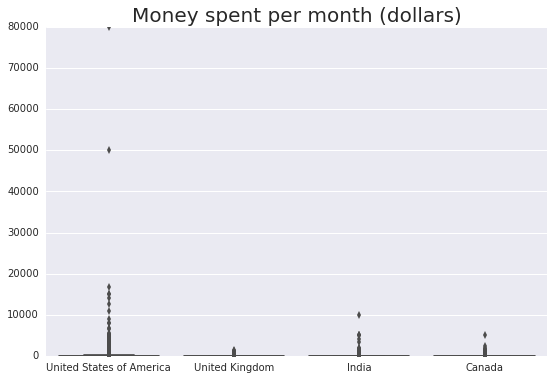

In [121]:
import seaborn as sns
sns.boxplot(data= clean_survey_interest, x='CountryLive', y='MoneyPerMonth')
plt.title('Money spent per month (dollars)', fontsize=20)
plt.xlabel('')
plt.ylabel('')

Next we eliminate the extreme outliers.

In [127]:
clean_survey_interest = clean_survey_interest[clean_survey_interest['MoneyPerMonth'] < 6000]

In [128]:
clean_survey_interest.groupby(by='CountryLive')['MoneyPerMonth'].mean()

CountryLive
Canada                      113.510961
India                       113.748387
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


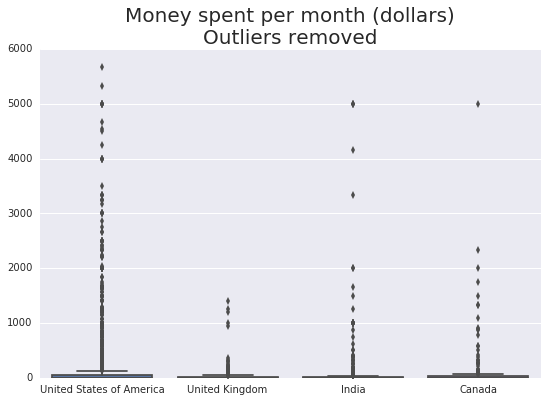

In [129]:
sns.boxplot(data= clean_survey_interest, x='CountryLive', y='MoneyPerMonth')
plt.title('Money spent per month (dollars)\nOutliers removed', fontsize=20)
plt.xlabel('')
plt.ylabel('')

Next we remove a few more outliers.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


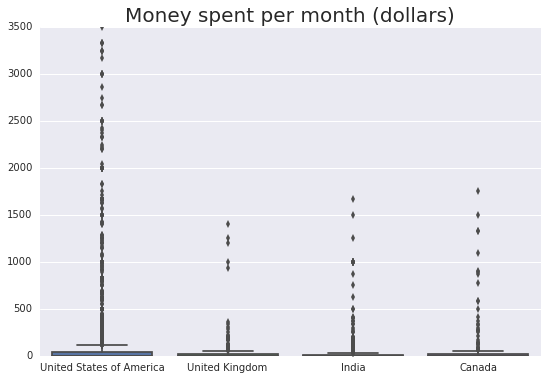

In [152]:
boolean_USA = (clean_survey_interest['CountryLive'] == 'United States of America') & (clean_survey_interest['MoneyPerMonth'] < 4000)
boolean_india = (clean_survey_interest['CountryLive'] == 'India') & (clean_survey_interest['MoneyPerMonth'] < 2000)
boolean_canada = (clean_survey_interest['CountryLive'] == 'Canada') & (clean_survey_interest['MoneyPerMonth'] < 2000)
boolean_uk = (clean_survey_interest['CountryLive'] == 'United Kingdom') & (clean_survey_interest['MoneyPerMonth'] < 2000)
clean_survey_interest = clean_survey_interest[boolean_USA | boolean_india | boolean_canada | boolean_uk] 

sns.boxplot(data= clean_survey_interest, x='CountryLive', y='MoneyPerMonth')
plt.title('Money spent per month (dollars)', fontsize=20)
plt.xlabel('')
plt.ylabel('')

In [153]:
clean_survey_interest.groupby(by='CountryLive')['MoneyPerMonth'].mean()

CountryLive
Canada                       75.550481
India                        57.256604
United Kingdom               45.534443
United States of America    119.306296
Name: MoneyPerMonth, dtype: float64

It is clear that the first country we should advertise in is the **USA**. However, it is less clear what other country the company should advertise in. Considering that the subscriptions that the company sells cost $59 per month, UK customers might not be inclined to spend that much. We conclude that both Canada and India are legitimate choices. Let us investigate further.

In [155]:
clean_survey_interest[clean_survey_interest['CountryLive']=='Canada'].shape

(237, 137)

In [156]:
clean_survey_interest[clean_survey_interest['CountryLive']=='India'].shape

(455, 137)

Both Canada and India contain a large number of possible customers, but India has significantly more. This suggests that, having to choose two markets in which to advertise, **USA** and **India** would be the preferred choices.